# Лабораторная работа №1 по вычислительной математики.

## Работу выполнил: Шурыгин Антон, Б01 - 909.


Подключаем необходимые библиотеки.

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp 

- Определяем переменную $x$ - аргумент будущих функций, $x_0$ - конкретное значение $x$.
- Определяем бесконечно малое $\varepsilon$
- Cоздаем ```dict()``` для функций.

In [117]:
x = sp.Symbol('x')
x_0 = np.pi / 4
eps = np.finfo(float).eps

func_map = {"sin(x^2)" : sp.sin(x ** 2), 
            "cos(sin(x))" : sp.cos(sp.sin(x)), 
            "exp(sin(cos(x)))" : sp.exp(sp.sin(sp.cos(x))), 
            "ln(x + 3)" : sp.log(x + 3),
            "(x + 3)^(0,5)" : (x + 3) ** (1/2)}

### Определяем класс, отвечающий за ошибку метода взятия производной.

- Члены класса:

```abs_err_meth``` - абсолютная погрешность метода взятия производной.

```err_meth_name``` - название метода.

 - Метод класса:

```plot(func, func_name)``` - визуализация абсолютной погрешности в двойной логарифмическом масштабе. 

 

In [118]:
class ErrorMeth():
  def __init__(self, abs_error, meth_name):
    self.abs_err_meth = abs_error
    self.err_meth_name = meth_name
  
  def plot(self, func, func_name):
    
    n_arr = np.linspace(1, 21, 21)
    h_arr = (2)/(2 ** n_arr)

    err_arr = self.abs_err_meth(func, h_arr)

    plt.xlabel("log(h)")
    plt.ylabel("log(err)")

    return plt.loglog(h_arr, err_arr, label=self.err_meth_name)

## Рассчитываем полные погрешности методов взятия производной, получаем: 

#### Погрешность метода №1 :
$$
\Delta = \frac{f''(x)h}{2} + \frac{2\varepsilon}{h}
$$

#### Погрешность метода №2:
$$
\Delta =  \frac{-f''(x)h}{2} + \frac{2\varepsilon}{h}
$$

#### Погрешность метода №3:
$$
\Delta = \frac{f'''(x)h^{2}}{6} + \frac{\varepsilon}{h}
$$

#### Погрешность метода №4:
$$
\Delta = - \frac{f^{(5)}(x)h^{4}}{30} + \frac{3\varepsilon}{2h}
$$

#### Погрешность метода  №5:
$$
\Delta = \frac{f^{(7)}(x)h^{6}}{140} + \frac{55\varepsilon}{30h}
$$

- Определяем функции для рассчитанных погрешностей методов. 
- Создаем ```list()``` из этих функций, условных названий.

In [119]:
def meth1(func, h):
  return sp.diff(func, x, 2).subs(x, x_0) * (h / 2) + (2 * eps / h)

def meth2(func, h):
  return -sp.diff(func, x, 3).subs(x, x_0) * (h / 2) + (2 * eps / h)

def meth3(func, h):
  return sp.diff(func, x, 3).subs(x, x_0) * (h ** 2 )/ 6 + eps / h

def meth4(func, h):
  return -sp.diff(func, x, 5).subs(x, x_0) * h ** 4 / 30 + (3 * eps)/(2 * h) 

def meth5(func, h):
  return (sp.diff(func, x, 7).subs(x, x_0)) * (h ** 6 / 140) + (55 * eps)/(h  * 30) 


err_objs = [ErrorMeth(meth1, "Meth 1"), ErrorMeth(meth2, "Meth 2"), ErrorMeth(meth3, "Meth 3"), ErrorMeth(meth4, "Meth 4"), ErrorMeth(meth5, "Meth 5")]

### Определяем класс, отвечающий за визуализацию всех абсолютных погрешностей методов взятия производной для определенной функции.

- Члены класса:

```func``` - функция.

```func_name``` - название функции

- Методы класса:

```plot()``` - визуализация абс. погр. всех методов взятия производной для данной функции.

In [120]:
class ErrorGraph():
  
  def __init__(self, func_tuple):

    self.func = func_tuple[1]
    self.func_name = func_tuple[0]

  def plot(self):
    for obj_it in err_objs:
      obj_it.plot(self.func, self.func_name)
    
    plt.legend()
    plt.title(self.func_name)
    plt.show()


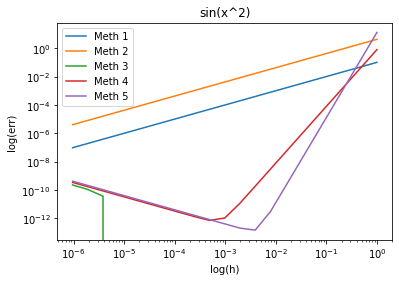

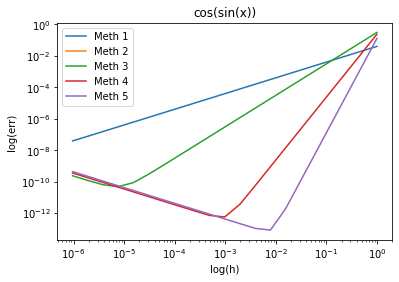

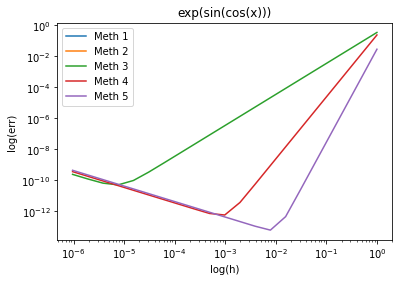

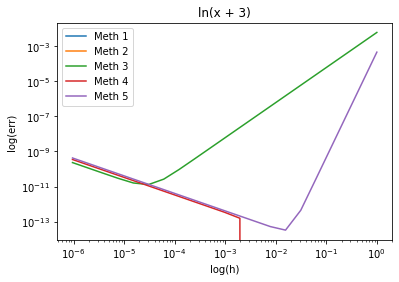

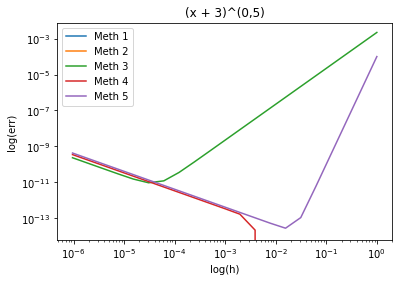

In [121]:
def main():
  
  for func_map_it in func_map.items():
    err_grph = ErrorGraph(func_map_it)
    err_grph.plot()
    
    
if __name__ == '__main__':
    main()